# Simple Monte Carlo Simulation of Stock Prices with Python

## Codealong

Source: https://youtu.be/_T0l015ecK4

## Import Libraries

In [39]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use('ggplot')

## Import Data

In [24]:
start = dt.datetime(2017,1,3)
end = dt.datetime(2017,11,20)

In [25]:
prices = web.DataReader('AAPL','yahoo',start=start,end=end)

In [26]:
prices = prices['Close']

In [27]:
prices.head(1)

Date
2017-01-03    29.0375
Name: Close, dtype: float64

In [28]:
prices.tail(1)

Date
2017-11-20    42.494999
Name: Close, dtype: float64

In [30]:
prices.isnull().sum()

0

In [31]:
prices.isna().sum()

0

In [33]:
prices.isnull().sum()

0

In [38]:
prices.notna().sum() == len(prices)

True

<AxesSubplot:xlabel='Date'>

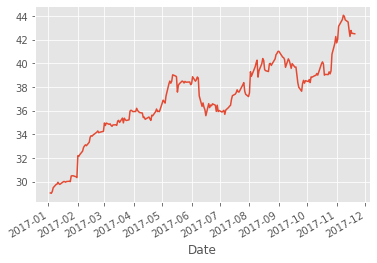

In [42]:
prices.plot()

## Process Data

### Calculate Daily Returns

In [49]:
returns = prices.pct_change()
print(returns.head())

Date
2017-01-03         NaN
2017-01-04   -0.001119
2017-01-05    0.005085
2017-01-06    0.011148
2017-01-09    0.009159
Name: Close, dtype: float64


## Extract Last Price

In [45]:
last_price = prices[-1]
print(last_price)

42.494998931884766


## Monte-Carlo Analysis

### Number of Simulations

In [47]:
num_simulations = 1000

### Define time horizon

In [48]:
num_days = 252

In [60]:
simulation_df = pd.DataFrame()

for x in range(num_simulations):
    
    daily_volatility = returns.std()
    
    price_list = []
    
    price = last_price * (1 + np.random.normal(loc=0.0,scale = daily_volatility))
    price_list.append(price)
    
    count = 0
    for y in range(num_days):
        if count == (num_days-1):
            break
        price = price_list[count] * (1 + np.random.normal(loc=0.0,scale = daily_volatility)) 
        price_list.append(price)  
        count +=1
        
    simulation_df[x] = price_list
        
    
        
    
    
    

In [61]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,41.983086,42.034447,42.291952,42.575081,42.468719,42.488174,43.006454,41.943475,42.385471,42.325897,...,42.771215,42.616468,43.266472,42.156555,41.469822,42.494008,42.211071,42.570562,42.203673,43.273959
1,42.107659,42.137934,42.436821,42.612158,42.178754,42.916500,43.277242,41.125034,42.705377,41.970852,...,41.853424,42.925010,43.590372,41.640707,41.831496,42.224515,42.756585,42.921764,42.221770,43.843113
2,41.892324,42.063521,42.446252,42.438801,41.994404,42.525639,43.943445,41.165002,43.293990,41.569009,...,41.887840,42.787686,44.562294,40.887973,41.776009,41.491906,42.373915,42.509247,42.012504,44.269476
3,41.573747,41.836907,42.930555,42.318165,42.493306,42.210727,45.115734,41.553693,43.207988,41.736003,...,42.393858,42.489620,44.916408,40.481033,41.043143,42.083406,42.500573,43.273656,41.502497,43.577572
4,41.400997,42.364076,42.682335,42.032263,43.343766,42.164616,45.548373,41.327608,43.382927,41.337956,...,42.377633,42.918961,44.952353,40.398864,39.716329,41.601131,43.299802,42.905298,41.366034,43.891124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,49.657407,42.217885,39.181162,34.375371,34.323725,48.446146,46.633907,46.813432,42.869334,36.293194,...,31.936342,29.055270,41.606623,39.632882,33.276120,44.085105,32.897823,30.760762,40.490334,48.672062
248,49.542005,42.270497,39.004288,34.439527,34.057200,47.934753,47.034536,46.324551,42.566220,36.930609,...,32.399754,28.838394,42.189489,39.878592,32.807905,44.201368,32.402567,30.537343,40.657803,48.104302
249,49.396924,42.182905,39.225281,34.799355,34.053899,48.491043,47.263853,46.494613,42.611063,36.709876,...,32.505178,28.995179,41.878445,39.421944,32.335606,44.401781,32.530610,30.832561,39.515653,48.064006
250,49.431006,41.162371,38.359980,34.951964,34.259085,49.293830,46.253516,46.977671,41.800920,37.063921,...,32.860929,29.436210,41.446571,39.707969,32.502718,45.026447,32.744857,30.815019,39.877403,47.622669


<AxesSubplot:>

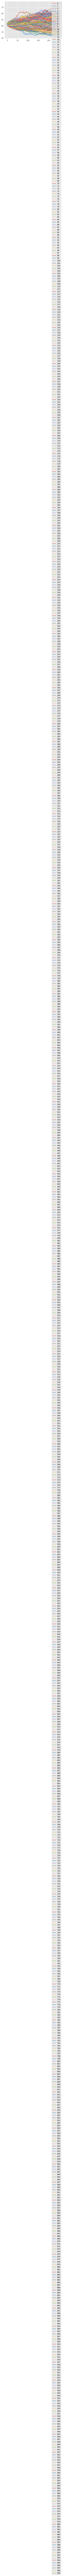

In [64]:
simulation_df.plot()